Management has been contracted to make recommendations to a website provider who is trying to find an AI model which can help label images. The important aspect in this analysis is to achieve the highest possible accuracy in image classification. Training time is not a consideration. Our team has chosen to attack this problem using convolutional neurl networks(CNN). We will be testing using two types of optimizers SGD and Adam. In all but the first training session a learning rate of .001 was used. In the first training session .01 was used as the learning rate. In preliminary testing different batch sizes were worked with from 50 to 200 and it was decided to use a batch size of 75 for the final training comparisons. The number of epochs used in the training was 50. Images of cats and dogs were supplied by the web site provideer but it proved insufficient due to the limited number of images. The team decided to use a subset from the kaggle contest randomly selecting 5000 cats and 5000 dogs from their set of images due to memory constrints. We were able to find a suitable combination using this data.

In [3]:
import numpy as np         # dealing with arrays
import os                  # dealing with directories
from random import shuffle 
import matplotlib.pyplot as plt

import keras
import time

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from keras import optimizers
from keras.layers import Dense, Activation
from keras.models import Sequential
from keras.layers import Dense, Flatten, Activation, Conv2D, MaxPooling2D
from keras.optimizers import Adadelta, RMSprop, Adam, SGD
from keras.losses import categorical_crossentropy
from keras.wrappers.scikit_learn import KerasClassifier

In [30]:
c_data = np.load('cats_photos.npy')
d_data = np.load('dogs_photos.npy')

Above the libraries which will be used in this study are are imported and the kaggle cat and dog images are retreived. The code to build npy files is not included to reduce size of the notebook. The images are loaded into numpy arrays c_data and d_data.

In [50]:
train_cat = c_data[np.random.choice(c_data.shape[0], 5000, replace=False), :]

In [51]:
train_dog = d_data[np.random.choice(d_data.shape[0], 5000, replace=False), :]

In [52]:
X_cd = np.concatenate((train_cat, train_dog), axis = 0) 

In [53]:
y_cd = np.concatenate((np.zeros((5000), dtype = np.int32), 
                       np.ones((5000), dtype = np.int32)), axis = 0)

In [23]:
from sklearn.model_selection import train_test_split

Xcd_train, Xcd_test, ycd_train, ycd_test = 
          train_test_split(X_cd, y_cd, test_size=0.20,  
                        shuffle=True, random_state = 42)

In [24]:
Xncd_train = Xcd_train/255

In the next section of code the training data and the validation test data are parsed. First 5000 images of cats and dogs are randomly selected from the cat and dog arrays. I tried using the data supplied by the web provider but 2000 images was not enough to build an accurate model. The two subsets of kaggle data contain enough images to build an accurate model. The label data is constructed with the understanding that the first 5000 records are cats and the secong 5000 records are dogs. This data is then split into training and labeled testing data using train_test_split. The final step in this section is normalizing the traing data by dividing it by 255.

In [31]:
t_data = np.load('test_photos.npy')

In [60]:
test_cnn = t_data[np.random.choice(t_data.shape[0], 5000, replace=False), :]

The npy file is loaded into a numpy array. There are 12500 records and we will be predicting with 5000 records. I then randomly select 5000 recordes

In [58]:
# https://machinelearningmastery.com/how-to-develop-a-convolutional-neural-network-to-classify-photos-of-dogs-and-cats/

from keras.layers import Input, Dense, Conv2D, BatchNormalization
from keras.layers import Activation, Flatten, MaxPool2D
from keras.models import Model

def cnn1layer_model(opt):
    model = Sequential()
    model.add(Conv2D(64, (2, 2), activation='relu', 
                     kernel_initializer='he_uniform', 
                     input_shape=Xcd_train.shape[1:], padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(1, activation='sigmoid'))
    # compile model
    model.compile(optimizer=opt, loss='binary_crossentropy', 
                  metrics=['accuracy'])
    return model


The function above is used to construct a convolutional neural network. It contains one convolution max pooling pair. The optimezer is an input parameter of the function.

In [59]:
# https://machinelearningmastery.com/how-to-develop-a-convolutional-neural-network-to-classify-photos-of-dogs-and-cats/

from keras.layers import Input, Dense, Conv2D, BatchNormalization
from keras.layers import Activation, Flatten, MaxPool2D
from keras.models import Model

def cnn2layer_model(opt):
    model = Sequential()
    # block 1
    model.add(Conv2D(32, (3, 3), activation='relu', 
                     kernel_initializer='he_uniform', padding='same', 
                     input_shape=Xcd_train.shape[1:]))
    model.add(MaxPooling2D((2, 2)))
    # block 2
    model.add(Conv2D(64, (3, 3), activation='relu', 
                     kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(1, activation='sigmoid'))
    # compile model
    model.compile(optimizer=opt, loss='binary_crossentropy', 
                  metrics=['accuracy'])
    return model


The function above is used to construct a convolutional neural network. It contains two convolutional layer max pooling pairs. It is a double block CNN. The optimezer is an input parameter of the function.

In [41]:
def disp_model(history):

    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

The function above is used to display a accuracy and a loss graph by epoch for training and labeled test data.

In [54]:
sgd1_model = cnn1layer_model(SGD(lr=0.01, momentum=0.5))

In [132]:
start = time.perf_counter()
sgd1_history = sgd1_model.fit(Xncd_train, ycd_train, 
                              validation_data=(Xcd_test, ycd_test), 
                              epochs=50, batch_size=75, verbose=0)
elapsed = time.perf_counter() - start

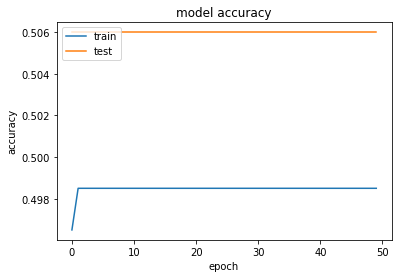

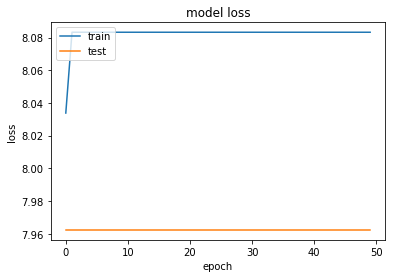

In [135]:
disp_model(sgd1_history)

In the preceding section of code I build a convolutional network using cnn1layer_model function. The model is a convolutional network with one convultional layer max pooling layer block. It uses a learning rate of .01 and a SGD optimizer. This model required 2607 seconds to process and had a training accuracy of .495 and a labeled testing accuracy of .506. The accuracy and loss graphs are displayed per epoch for both training and labeled testing data. This is not a very accurate model.

In [55]:
sgd2_model = cnn2layer_model(SGD(lr=0.001, momentum=0.5))

In [137]:
start2 = time.perf_counter()
sgd2_history = sgd2_model.fit(Xncd_train, ycd_train, 
                              validation_data=(Xcd_test, ycd_test), 
                              epochs=50, batch_size=75, verbose=0)
elapsed2 = time.perf_counter() - start2

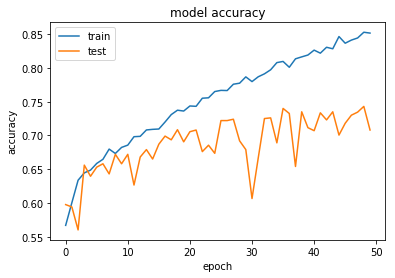

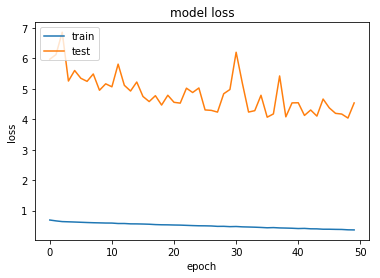

In [139]:
disp_model(sgd2_history)

In the preceding section of code I build a convolutional network using cnn2layer_model function. The model is a convolutional network with two convultional layer max pooling layer blocks. It uses a learning rate of .001 and a SGD optimizer. This model required 3230 seconds to process and had a training accuracy of .850 and a labeled testing accuracy of .710. The accuracy and loss graphs are displayed per epoch for both training and labeled testing data. This is the best model I built in this analysis. The learning rate and the extra convolutional layer helped improve the model.

In [56]:
adam1_model = cnn1layer_model(Adam(lr=0.001))

In [141]:
start3 = time.perf_counter()
adam1_history = adam1_model.fit(Xncd_train, ycd_train, 
                                validation_data=(Xcd_test, ycd_test), 
                                epochs=50, batch_size=75, verbose=0)
elapsed3 = time.perf_counter() - start3

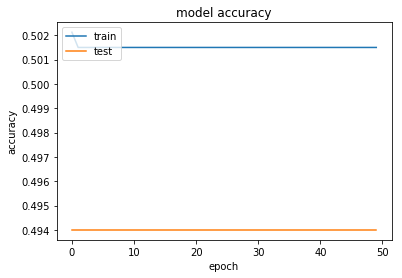

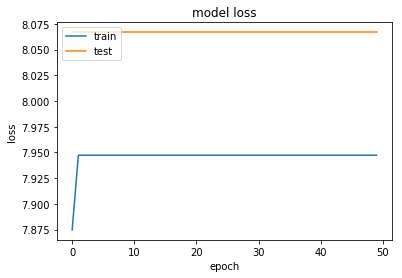

In [144]:
disp_model(adam1_history)

In the preceding section of code I build a convolutional network using cnn1layer_model function. The model is a convolutional network with one convultional layer max pooling layer block. It uses a learning rate of .001 and an Adam optimizer. This model required 3141 seconds to process and had a training accuracy of .501 and a labeled testing accuracy of .494. The accuracy and loss graphs are displayed per epoch for both training and labeled testing data. This is not a very accurate model.

In [57]:
adam2_model = cnn2layer_model(Adam(lr=0.001))

In [146]:
start4 = time.perf_counter()
adam2_history = adam2_model.fit(Xncd_train, ycd_train, 
                                validation_data=(Xcd_test, ycd_test), 
                                epochs=50, batch_size=75, verbose=0)
elapsed4 = time.perf_counter() - start4

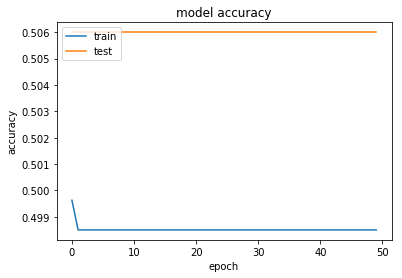

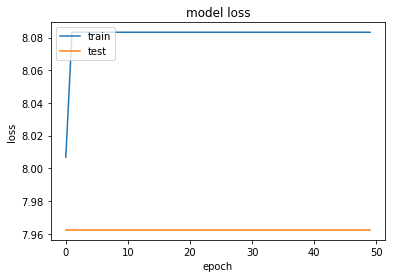

In [149]:
disp_model(adam2_history)

In the preceding section of code I build a convolutional network using cnn2layer_model function. The model is a convolutional network with two convultional layer max pooling layer blocks. It uses a learning rate of .001 and a Adam optimizer. This model required 3204 seconds to process and had a training accuracy of .499 and a labeled testing accuracy of .506. The accuracy and loss graphs are displayed per epoch for both training and labeled testing data. This is not a very accurate model.

In [10]:
Optimizer = ["SGD", "SGD","Adam", "Adam"]
CNNBlocks = ["1", "2","1", "2"]
Processing_Time = ["2607", "3230", "3141", "3204"]
Training_Set_Accuracy = [".498", ".850", ".501", ".499"]
Test_Set_Accuracy = [".506", ".710", ".494", ".506"]

In [11]:
from prettytable import PrettyTable

In [61]:
table = PrettyTable(['Optimizer', 'CNN Blocks', 'Process_Time', 
                     'Train_Set_Acc', 'Test_Set_Acc'])
for x in range(0, 4):
    table.add_row( [Optimizer[x], CNNBlocks[x], 
                   Processing_Time[x], 
                   Training_Set_Accuracy[x], 
                   Test_Set_Accuracy[x]])
print(table)

+-----------+------------+--------------+---------------+--------------+
| Optimizer | CNN Blocks | Process_Time | Train_Set_Acc | Test_Set_Acc |
+-----------+------------+--------------+---------------+--------------+
|    SGD    |     1      |     2607     |      .498     |     .506     |
|    SGD    |     2      |     3230     |      .850     |     .710     |
|    Adam   |     1      |     3141     |      .501     |     .494     |
|    Adam   |     2      |     3204     |      .499     |     .506     |
+-----------+------------+--------------+---------------+--------------+


Here is a summary of the results from the four models tested Two SGD and Adam optimizer CNNs each with a single block CNN and a double block CNN. Clearly sgd2_model is the winner. It has a good train test comparison. It appears that improving the learning rate didn't have much affect because things didn't improve for Adam. Most likely the improvement was gained from the double convolutional block. Due to the original length of this document data summarized above elapsed time and accuracy is not shown in the individual sections for each model. The data was written down and is displayed in this summary.

In [42]:
sgd2_model = cnn2layer_model(SGD(lr=0.001, momentum=0.5))
sgd2_model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 128, 128, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 65536)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               8388736   
_________________________________________________________________
dens

In [43]:
startt = time.perf_counter()
sgd2_history = sgd2_model.fit(Xncd_train, ycd_train, 
                              validation_data=(Xcd_test, ycd_test), 
                              epochs=50, batch_size=75, verbose=0)
elapsedt = time.perf_counter() - startt

Instructions for updating:
Use tf.cast instead.


In [46]:
predictions = sgd2_model.predict(test_cnn)

In [48]:
for i in range(0,9):
    print(max(predictions[i]), np.argmax(predictions[i]))

1.0 0
1.0 0
1.0 0
0.0 0
0.0 0
0.0 0
0.0 0
1.0 0
1.0 0


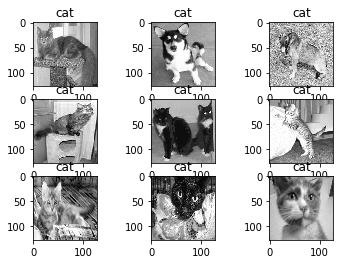

In [49]:
for i in range(0,9):
    plt.subplot(330 + (i+1))
    plt.imshow(timages[i], cmap=plt.get_cmap('gray'))
    plt.title('cat')

Above I rebuild the winning model to do some predictions on the unlabeled test data using the sgd2_model. I list out the the first nine predictions and display the first nine images. My model predicted 7 out of nine which is in line with the accuracy scores from the orignal model. The new version of the model is slightly better than the original version with a processing time of 3065 seconds and accuracies of train .876 and labeled test .740. This may be because I had a memory error after running the first four models during the analysis phase. I had to restart the system in order to regain control of my notebook. This provided more memory for the prediction run. Maybe the algorithm works better when there is ample memory. The two images which were incorrect in the predictions are the last two cats. I think the small dark head surrounded by a mostly white background made it difficult to discern what kind of pet was in the image. As to the last image the cat's head is very large. Dogs tend to have bigger heads and I think this confused the model. Based on our studies I would recommend to the web provider a convolutional neural network with two convolutional max pooling blocks and a SGD optimizer for classifying images. The learning rate should be set to .001 with 50 epochs and a batch size of 75.